# Sumário

1. [**Instalação de Bibliotecas, Imports e Carregamento do Arquivo**](#1.-Instalação-de-Bibliotecas,-Imports-e-Carregamento-do-Arquivo)
2. [**Base de Dados**](#2.-Base-de-Dados)
3. [**Diagnóstico e Qualidade de Dados**](#3.-Diagnóstico-e-Qualidade-de-Dados)
    - 3.1 [Análise de Metadados e Falsos Nulos](#3.1-Análise-de-Metadados-e-Falsos-Nulos)
    - 3.2 [Identificação de Outliers de Duração](#3.2-Identificação-de-Outliers-de-Duração)
    - 3.3 [Distribuição de Runtime](#3.3-Distribuição-de-Runtime)
    - 3.4 [Relevância Estatística: Votos vs Nota](#3.4-Relevância-Estatística:-Votos-vs-Nota)
4. [**Panorama Geral**](#4.-Panorama-Geral)
    - 4.1 [Indicadores Chave de Performance (KPIs) em Dashboard Cards](#4.1-Indicadores-Chave-de-Performance-(KPIs)-em-Dashboard-Cards)
    - 4.2 [Top 10 Filmes Mais Populares até 2024](#4.2-Top-10-Filmes-Mais-Populares-até-2024)
    - 4.3 [Distribuição dos Gêneros dos Filmes]()
5. [**Análise Temporal**](#5.-Análise-Temporal)
    - 5.1 [A Qualidade dos Filmes ao Longo do Tempo](#5.1-A-Qualidade-dos-Filmes-ao-Longo-do-Tempo)
    - 5.2 [Sazonalidade de Lançamentos (por mês)](#5.2-Sazonalidade-de-Lançamentos-(por-mês))
    - 5.3 [Evolução da Receita Total da Indústria Cinematográfica (1920-2024)](#5.3-Evolução-da-Receita-Total-da-Indústria-Cinematográfica-(1920-2024))
6. [**Segmentação de Mercado e Produção**](#6.-Segmentação-de-Mercado-e-Produção)
    - 6.1 [Contagem de Produtoras por Filme](#6.1-Contagem-de-Produtoras-por-Filme)
    - 6.2 [Produtoras com Mais Filmes Produzidos](#6.2-Produtoras-com-Mais-Filmes-Produzidos)
    - 6.3 [Análise da Receita por Quantidade de Produtoras](#6.3-Análise-da-Receita-por-Quantidade-de-Produtoras)
    - 6.4 [Top 15 Gêneros por Receita Total](#6.4-Top-15-Gêneros-por-Receita-Total)
    - 6.5 [Top 15 Países Produtores (por volume)](#6.5-Top-15-Países-Produtores-(por-volume))
    - 6.6 [Correlação entre Variáveis Financeiras e Popularidade](#6.6-Correlação-entre-Variáveis-Financeiras-e-Popularidade)
    - 6.7 [Duração x Popularidade]()
7. [**Análise Financeira**](#7.-Análise-Financeira)
    - 7.1 [Heatmap de ROI médio por década e gênero (top 8)](#7.1-Heatmap-de-ROI-médio-por-década-e-gênero-(top-8))
    - 7.2 [Orçamento vs Lucro](#7.2-Orçamento-vs-Lucro)

# 1. Instalação de Bibliotecas, Imports e Carregamento do Arquivo

In [ ]:
# Instalação das bibliotecas necessárias
%pip install pandas numpy matplotlib seaborn psycopg2-binary sqlalchemy --quiet

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches
from sqlalchemy import create_engine

# Configuração da conexão com o banco de dados PostgreSQL
DB_CONFIG = {
    'host': 'localhost',
    'port': 5433,
    'database': 'grupo08',
    'user': 'postgres',
    'password': 'postgres'
}

# Criar engine de conexão
engine = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"
)

# Carregar dados da tabela silver.filmes
print("Conectando ao banco de dados PostgreSQL...")
df = pd.read_sql("SELECT * FROM silver.filmes", engine)
print(f"✅ Dados carregados com sucesso! Total de registros: {len(df):,}")
df

Note: you may need to restart the kernel to use updated packages.
Conectando ao banco de dados PostgreSQL...
✅ Dados carregados com sucesso! Total de registros: 1,174,587


,id,title,original_title,original_language,release_date,release_year,release_month,release_month_name,release_day_of_week,release_day_name,...,vote_average,vote_count,popularity,budget,revenue,profit,roi,is_profitable,budget_tier,created_at
0,565770,Blue Beetle,Blue Beetle,en,2023-08-16,2023.0,8.0,Agosto,2.0,Quarta,...,7.14,1023,2994.357,120000000.0,124818235.0,4818235.0,4.015196,True,Muito Alto ($100M - $200M),2026-01-19 20:07:57.517120
1,980489,Gran Turismo,Gran Turismo,en,2023-08-09,2023.0,8.0,Agosto,2.0,Quarta,...,8.07,702,2680.593,60000000.0,114800000.0,54800000.0,91.333333,True,Alto ($50M - $100M),2026-01-19 20:07:57.517120
2,968051,The Nun II,The Nun II,en,2023-09-06,2023.0,9.0,Setembro,2.0,Quarta,...,6.55,365,1692.778,38500000.0,231200000.0,192700000.0,500.519481,True,Medio ($10M - $50M),2026-01-19 20:07:57.517120
3,615656,Meg 2: The Trench,Meg 2: The Trench,en,2023-08-02,2023.0,8.0,Agosto,2.0,Quarta,...,6.91,2034,1567.273,129000000.0,384056482.0,255056482.0,197.718203,True,Muito Alto ($100M - $200M),2026-01-19 20:07:57.517120
4,762430,Retribution,Retribution,en,2023-08-23,2023.0,8.0,Agosto,2.0,Quarta,...,6.82,258,1547.220,20000000.0,12905464.0,-7094536.0,-35.472680,False,Medio ($10M - $50M),2026-01-19 20:07:57.517120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174582,1408539,Derby Days: Welcome to Sarajevo,Derby Days: Welcome to Sarajevo,en,2014-11-09,2014.0,11.0,Novembro,6.0,Domingo,...,0.00,0,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-19 20:07:57.517120
1174583,1283768,Italy Bares: Secondo Tempo,Italy Bares: Secondo Tempo,es,None,NaN,NaN,None,NaN,None,...,5.25,4,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-19 20:07:57.517120
1174584,1202178,Højst besynderlige typer,Højst besynderlige typer,da,None,NaN,NaN,None,NaN,None,...,6.50,4,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-19 20:07:57.517120
1174585,1202208,Muumipeikko ja pyrstötähti,Muumipeikko ja pyrstötähti,fi,2023-09-15,2023.0,9.0,Setembro,4.0,Sexta,...,7.00,4,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-19 20:07:57.517120


# 2. Base de Dados

### Sobre
O presente projeto utiliza o dataset do **TMDB (The Movie Database)**, uma base que compila metadados de aproximadamente 1 milhão de obras cinematográficas. Os dados estão armazenados na camada **Silver** do banco de dados PostgreSQL, contendo dados limpos e transformados com 29 colunas, incluindo variáveis como títulos, gêneros, orçamentos, receitas, índices de popularidade e métricas derivadas (ROI, profit, etc.). Pela sua amplitude e profundidade histórica, a base é ideal para estudos de ciência de dados, análises de tendências de mercado e desenvolvimento de sistemas de recomendação.

### Conexão com o Banco de Dados
- **Host**: localhost
- **Porta**: 5433
- **Database**: grupo08
- **Schema**: silver
- **Tabela**: filmes

Para fins de verificação e conferência da estrutura, apresentam-se abaixo os **cinco registros iniciais**.

In [4]:
df

,id,title,original_title,original_language,release_date,release_year,release_month,release_month_name,release_day_of_week,release_day_name,...,vote_average,vote_count,popularity,budget,revenue,profit,roi,is_profitable,budget_tier,created_at
0,565770,Blue Beetle,Blue Beetle,en,2023-08-16,2023.0,8.0,Agosto,2.0,Quarta,...,7.14,1023,2994.357,120000000.0,124818235.0,4818235.0,4.015196,True,Muito Alto ($100M - $200M),2026-01-19 20:07:57.517120
1,980489,Gran Turismo,Gran Turismo,en,2023-08-09,2023.0,8.0,Agosto,2.0,Quarta,...,8.07,702,2680.593,60000000.0,114800000.0,54800000.0,91.333333,True,Alto ($50M - $100M),2026-01-19 20:07:57.517120
2,968051,The Nun II,The Nun II,en,2023-09-06,2023.0,9.0,Setembro,2.0,Quarta,...,6.55,365,1692.778,38500000.0,231200000.0,192700000.0,500.519481,True,Medio ($10M - $50M),2026-01-19 20:07:57.517120
3,615656,Meg 2: The Trench,Meg 2: The Trench,en,2023-08-02,2023.0,8.0,Agosto,2.0,Quarta,...,6.91,2034,1567.273,129000000.0,384056482.0,255056482.0,197.718203,True,Muito Alto ($100M - $200M),2026-01-19 20:07:57.517120
4,762430,Retribution,Retribution,en,2023-08-23,2023.0,8.0,Agosto,2.0,Quarta,...,6.82,258,1547.220,20000000.0,12905464.0,-7094536.0,-35.472680,False,Medio ($10M - $50M),2026-01-19 20:07:57.517120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174582,1408539,Derby Days: Welcome to Sarajevo,Derby Days: Welcome to Sarajevo,en,2014-11-09,2014.0,11.0,Novembro,6.0,Domingo,...,0.00,0,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-19 20:07:57.517120
1174583,1283768,Italy Bares: Secondo Tempo,Italy Bares: Secondo Tempo,es,None,NaN,NaN,None,NaN,None,...,5.25,4,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-19 20:07:57.517120
1174584,1202178,Højst besynderlige typer,Højst besynderlige typer,da,None,NaN,NaN,None,NaN,None,...,6.50,4,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-19 20:07:57.517120
1174585,1202208,Muumipeikko ja pyrstötähti,Muumipeikko ja pyrstötähti,fi,2023-09-15,2023.0,9.0,Setembro,4.0,Sexta,...,7.00,4,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-19 20:07:57.517120


In [5]:
# Mostrar as 5 primeiras linhas do DataFrame
df.head(5)

,id,title,original_title,original_language,release_date,release_year,release_month,release_month_name,release_day_of_week,release_day_name,...,vote_average,vote_count,popularity,budget,revenue,profit,roi,is_profitable,budget_tier,created_at
0,565770,Blue Beetle,Blue Beetle,en,2023-08-16,2023.0,8.0,Agosto,2.0,Quarta,...,7.14,1023,2994.357,120000000.0,124818235.0,4818235.0,4.015196,True,Muito Alto ($100M - $200M),2026-01-19 20:07:57.517120
1,980489,Gran Turismo,Gran Turismo,en,2023-08-09,2023.0,8.0,Agosto,2.0,Quarta,...,8.07,702,2680.593,60000000.0,114800000.0,54800000.0,91.333333,True,Alto ($50M - $100M),2026-01-19 20:07:57.517120
2,968051,The Nun II,The Nun II,en,2023-09-06,2023.0,9.0,Setembro,2.0,Quarta,...,6.55,365,1692.778,38500000.0,231200000.0,192700000.0,500.519481,True,Medio ($10M - $50M),2026-01-19 20:07:57.517120
3,615656,Meg 2: The Trench,Meg 2: The Trench,en,2023-08-02,2023.0,8.0,Agosto,2.0,Quarta,...,6.91,2034,1567.273,129000000.0,384056482.0,255056482.0,197.718203,True,Muito Alto ($100M - $200M),2026-01-19 20:07:57.517120
4,762430,Retribution,Retribution,en,2023-08-23,2023.0,8.0,Agosto,2.0,Quarta,...,6.82,258,1547.220,20000000.0,12905464.0,-7094536.0,-35.472680,False,Medio ($10M - $50M),2026-01-19 20:07:57.517120


# 3. Diagnóstico e Qualidade de Dados

C:\Users\mathe\AppData\Local\Temp\ipykernel_5432\2820178962.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_counts.index.astype(str), y=tipo_counts.values, palette="viridis")


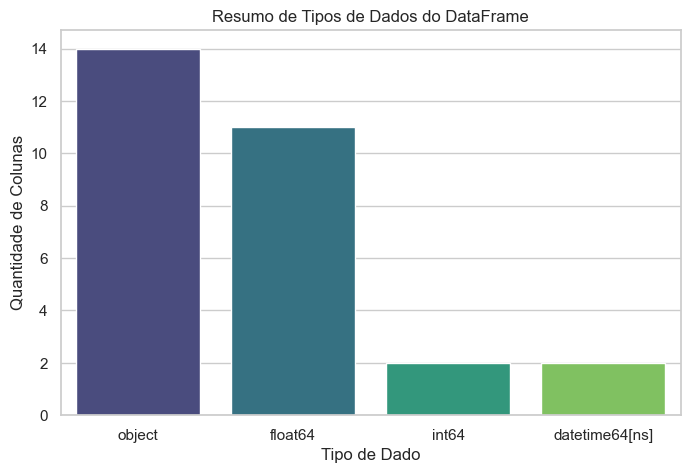

In [12]:
# Contagem de tipos de dados
tipo_counts = df.dtypes.value_counts()

# Configuração do estilo
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=tipo_counts.index.astype(str), y=tipo_counts.values, palette="viridis")
plt.title("Resumo de Tipos de Dados do DataFrame")
plt.xlabel("Tipo de Dado")
plt.ylabel("Quantidade de Colunas")
plt.show()


## 3.1 Análise de Metadados e Falsos Nulos

### Análise de Nulos - Numérico
Verifica valores que não deveriam estar marcados com 0 e sim vazios, tendo em vista que, em finanças e duração, 0 geralmente significa 'dado não coletado'.


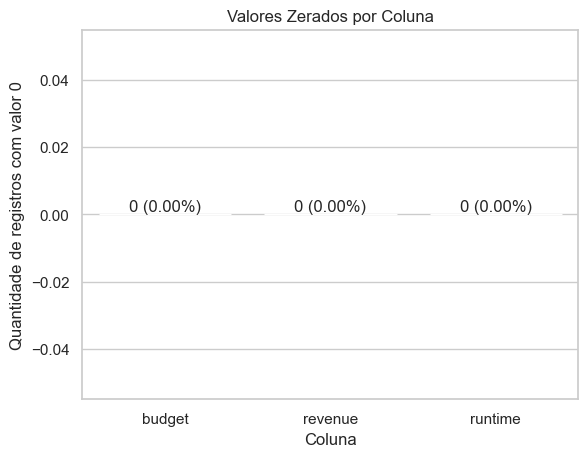

In [13]:
cols_zero = ['budget', 'revenue', 'runtime']

data = []
total = len(df)

for col in cols_zero:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        zeros = (df[col] == 0).sum()
        pct = (zeros / total) * 100
        data.append({
            'coluna': col,
            'zeros': zeros,
            'percentual': pct
        })

zeros_df = pd.DataFrame(data)

# Gráfico
plt.figure()
ax = sns.barplot(data=zeros_df, x='coluna', y='zeros')

plt.title('Valores Zerados por Coluna')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de registros com valor 0')

# Rótulos: quantidade + percentual
for i, row in zeros_df.iterrows():
    ax.text(
        i,
        row['zeros'],
        f"{row['zeros']} ({row['percentual']:.2f}%)",
        ha='center',
        va='bottom'
    )

plt.show()


### Análise de Nulos - Strings
Verifica colunas que deveriam ter conteúdo mas podem estar vazias ou apenas com espaços


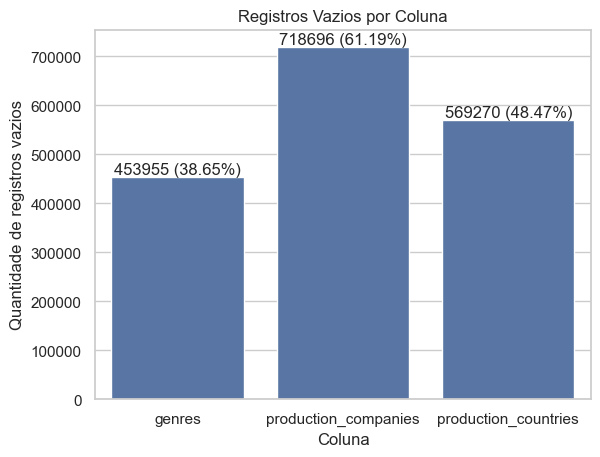

In [14]:
cols_list = ['genres', 'production_companies', 'production_countries']

data = []
total = len(df)

for col in cols_list:
    if col in df.columns:
        vazios = (
            df[col].isna().sum()
            + (df[col].astype(str).str.strip() == "").sum()
        )
        pct = (vazios / total) * 100
        data.append({
            'coluna': col,
            'vazios': vazios,
            'percentual': pct
        })

vazios_df = pd.DataFrame(data)

# Gráfico
plt.figure()
ax = sns.barplot(data=vazios_df, x='coluna', y='vazios')

plt.title('Registros Vazios por Coluna')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de registros vazios')

# Rótulos: quantidade + percentual
for i, row in vazios_df.iterrows():
    ax.text(
        i,
        row['vazios'],
        f"{row['vazios']} ({row['percentual']:.2f}%)",
        ha='center',
        va='bottom'
    )

plt.show()


## 3.2 Identificação de Outliers de Duração

### Duplicidade de Filme
Busca encontrar filmes com mesmo título e data de lançamento para entender se há duplicidade na base;

C:\Users\mathe\AppData\Local\Temp\ipykernel_5432\1557044770.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Não Duplicados', 'Duplicados'], y=[contagem[False], contagem[True]], palette="coolwarm")


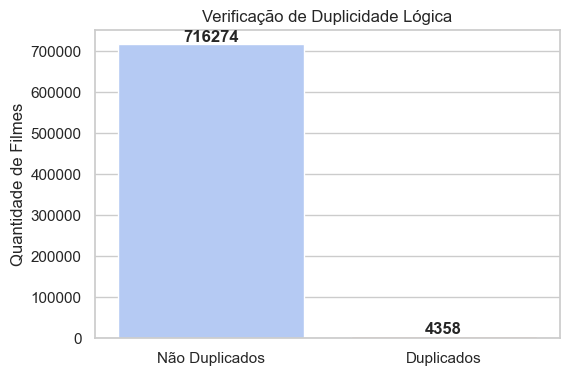

In [36]:
# Contagem de duplicados vs não duplicados
duplicados_total = df.duplicated(subset=['title', 'release_date'], keep=False)
contagem = duplicados_total.value_counts()  # True = duplicado, False = único

# Configuração do estilo
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=['Não Duplicados', 'Duplicados'], y=[contagem[False], contagem[True]], palette="coolwarm")

# Adicionar valores no topo das barras
for i, valor in enumerate([contagem[False], contagem[True]]):
    plt.text(i, valor + 5, str(valor), ha='center', va='bottom', fontweight='bold')

plt.title("Verificação de Duplicidade Lógica")
plt.ylabel("Quantidade de Filmes")
plt.show()


### Análise de Datas e Status
Busca identificar filmes sem data de lançamento ou marcados como lançado mas com data futura.

C:\Users\mathe\AppData\Local\Temp\ipykernel_5432\107861016.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(inconsistencias.keys()), y=list(inconsistencias.values()), palette="magma")


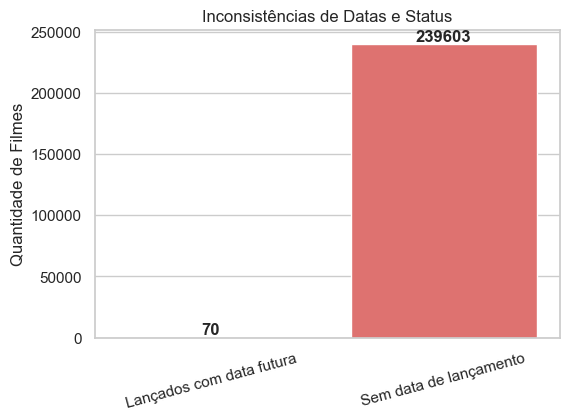

In [37]:
# Dados
inconsistencias = {
    "Lançados com data futura": futuros,
    "Sem data de lançamento": sem_data
}

# Configuração do estilo
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=list(inconsistencias.keys()), y=list(inconsistencias.values()), palette="magma")

# Adicionar valores no topo das barras
for i, valor in enumerate(inconsistencias.values()):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontweight='bold')

plt.title("Inconsistências de Datas e Status")
plt.ylabel("Quantidade de Filmes")
plt.xticks(rotation=15)
plt.show()



### Placeholders
Identificação de termos comuns que indicam que o dado não existe de fato.


In [ ]:
import re

# Cria um padrão escapando caracteres especiais
pattern = '|'.join([re.escape(t) for t in termos_placeholder])

# Filtra
filtro_lixo = df['overview'].str.contains(pattern, case=False, na=False, regex=True)

# Conta
qtd_lixo = filtro_lixo.sum()

print(f" - Overviews com textos 'placeholder' (lixo): {qtd_lixo}")



KeyError: 'overview'

## 3.3 Distribuição de Runtime

Podemos observar uma mudança significativa na nossa amostra da distribuição de **Runtime** após o ETL. Agora é possível ver uma variação de até **4%** nos filmes de **0–30 minutos**.  
Essa diferença ocorre devido à exclusão de filmes com duração zero e também à remoção de filmes adultos, o que gera essa distinção em relação à camada **RAW**.


### Distribuição de Runtime por Intervalos

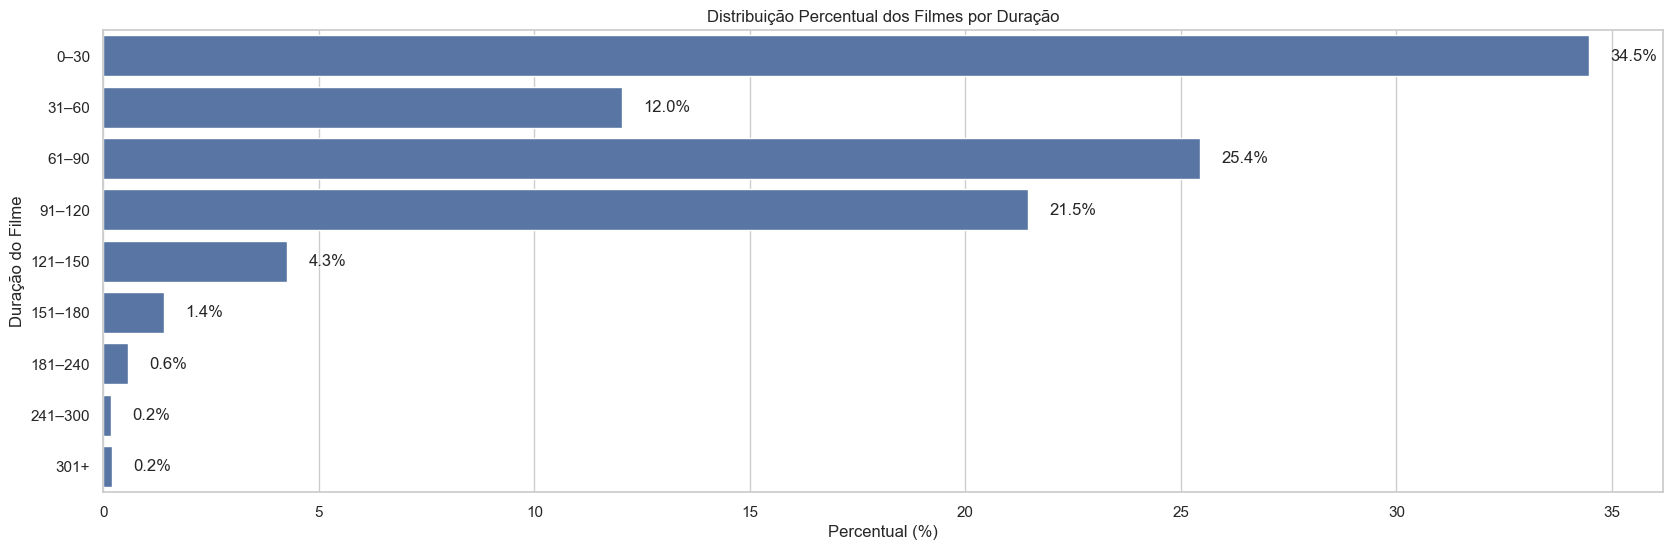

In [40]:

# Converte runtime para numérico
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Filtra runtime válido
df_limpo = df.dropna(subset=['runtime'])
df_limpo = df_limpo[(df_limpo['runtime'] >= 1) & (df_limpo['runtime'] <= 600)]

# Intervalos
bins = [0, 30, 60, 90, 120, 150, 180, 240, 300, 600]
labels = [
    '0–30', '31–60', '61–90', '91–120',
    '121–150', '151–180', '181–240',
    '241–300', '301+'
]

df_limpo['runtime_range'] = pd.cut(
    df_limpo['runtime'],
    bins=bins,
    labels=labels,
    right=True
)

# Contagem e percentual
runtime_counts = df_limpo['runtime_range'].value_counts().sort_index()
percentual = (runtime_counts / runtime_counts.sum()) * 100

plot_df = percentual.reset_index()
plot_df.columns = ['Intervalo (min)', 'Percentual']

# Gráfico
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.2, right=1.5)

ax = sns.barplot(
    data=plot_df,
    x='Percentual',
    y='Intervalo (min)'
)

plt.title('Distribuição Percentual dos Filmes por Duração')
plt.xlabel('Percentual (%)')
plt.ylabel('Duração do Filme')

# Rótulos
for i, v in enumerate(plot_df['Percentual']):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')

plt.show()




### Distribuição de Runtime por Década

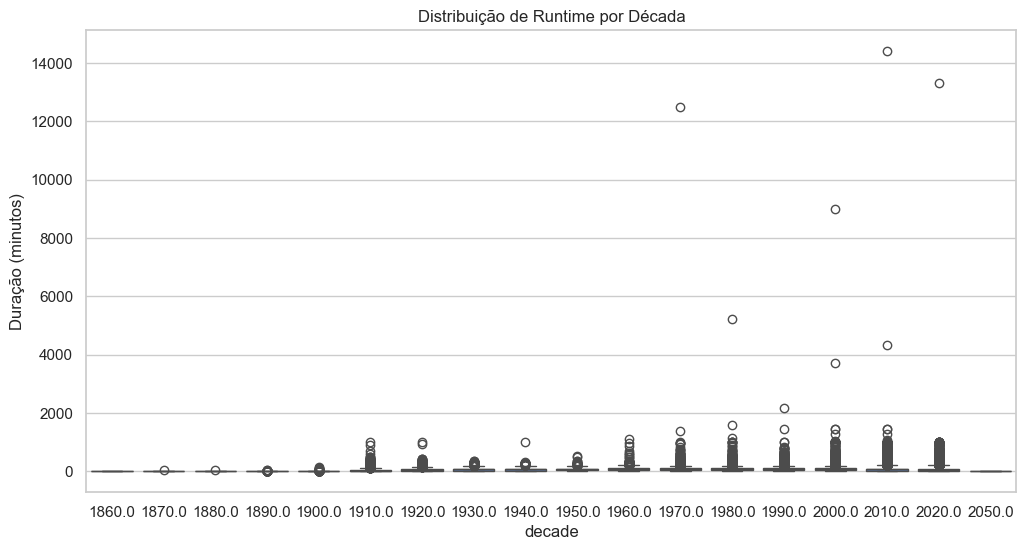

In [41]:
# Criando a coluna de década
df['decade'] = (df['release_date'].dt.year // 10) * 10
plt.figure(figsize=(12, 6))
sns.boxplot(x='decade', y='runtime', data=df[df['runtime'] > 0])
plt.title('Distribuição de Runtime por Década')
plt.ylabel('Duração (minutos)')
plt.show()

## 3.4 Relevância Estatística: Votos vs Nota

### Identificação de Falsos Populares

Abaixo, faremos uma análise sobre os outliers, valores que podem ser erros ou exceções na base.

Como mostra o gráfico de dispersão abaixo, podemos concluir que múltiplos filmes da base de dados do IMDb estão com nota 10, porém sem nenhum voto, o que gera certa inconsistência nos dados. Para a camada silver, esses outliers foram retirados, porém pode se ver que talvez seja necessária uma avaliação nova em cima dessa estatistica já que, agora que os filmes com nota 10 e nenhum voto sairam, foram encontrados multiplos filmes nota 10 com dois ou três votos, o que certamente caracteriza ainda um outlier.

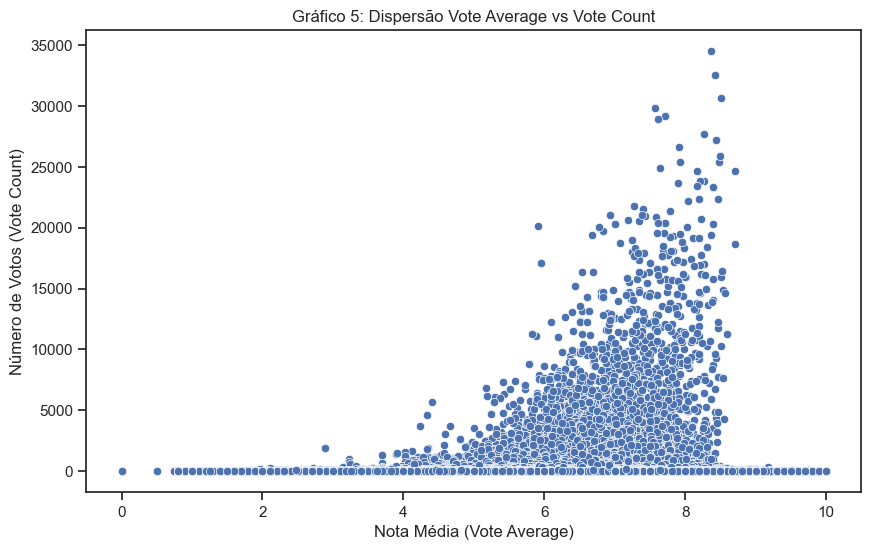

Possíveis outliers (poucos votos, nota alta):
                                            title  vote_average  vote_count
1174544                        Voices of the Void          10.0           2
1174541                                     Logos          10.0           3
1174540                              A Love Story          10.0           3
1174539                           O Clube da luta          10.0           3
1174445                  Full Movie 2: The Reboot          10.0           2
1174443                               The Fairies          10.0           2
1174435                                  The Pool          10.0           2
1174434  Searching for Hackers: Duel of the Hacks          10.0           2
1174433                     Andalusia, Spain vlog          10.0           2
1174430                 Feliz Cumpleaños Monchito          10.0           2


In [42]:
# Converte para numérico e remove NaN
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
df_limpo = df.dropna(subset=['vote_average', 'vote_count'])

# Gráfico de dispersão

sns.set_style('ticks')
plt.figure(figsize=(10,6))
sns.scatterplot(x='vote_average', y='vote_count', data=df_limpo)
plt.title('Gráfico 5: Dispersão Vote Average vs Vote Count')
plt.xlabel('Nota Média (Vote Average)')
plt.ylabel('Número de Votos (Vote Count)')
plt.show()

# Identificar possíveis outliers: filmes com poucos votos mas notas altas
# Ajuste os thresholds conforme necessário, talvez seja necessário intervalos maiores (ex: vote_count < 1000, vote_average > 7.5)
outliers = df_limpo[(df_limpo['vote_count'] < 100) & (df_limpo['vote_average'] > 8)].sort_values('vote_average', ascending=False)
print("Possíveis outliers (poucos votos, nota alta):")
print(outliers[['title', 'vote_average', 'vote_count']].head(10))

## 4. Panorama Geral

### 4.1 Indicadores Chave de Performance (KPIs) em Dashboard Cards

Este gráfico apresenta um conjunto de Indicadores Chave de Performance (KPIs), facilitando a leitura de padrões e comparações relevantes.


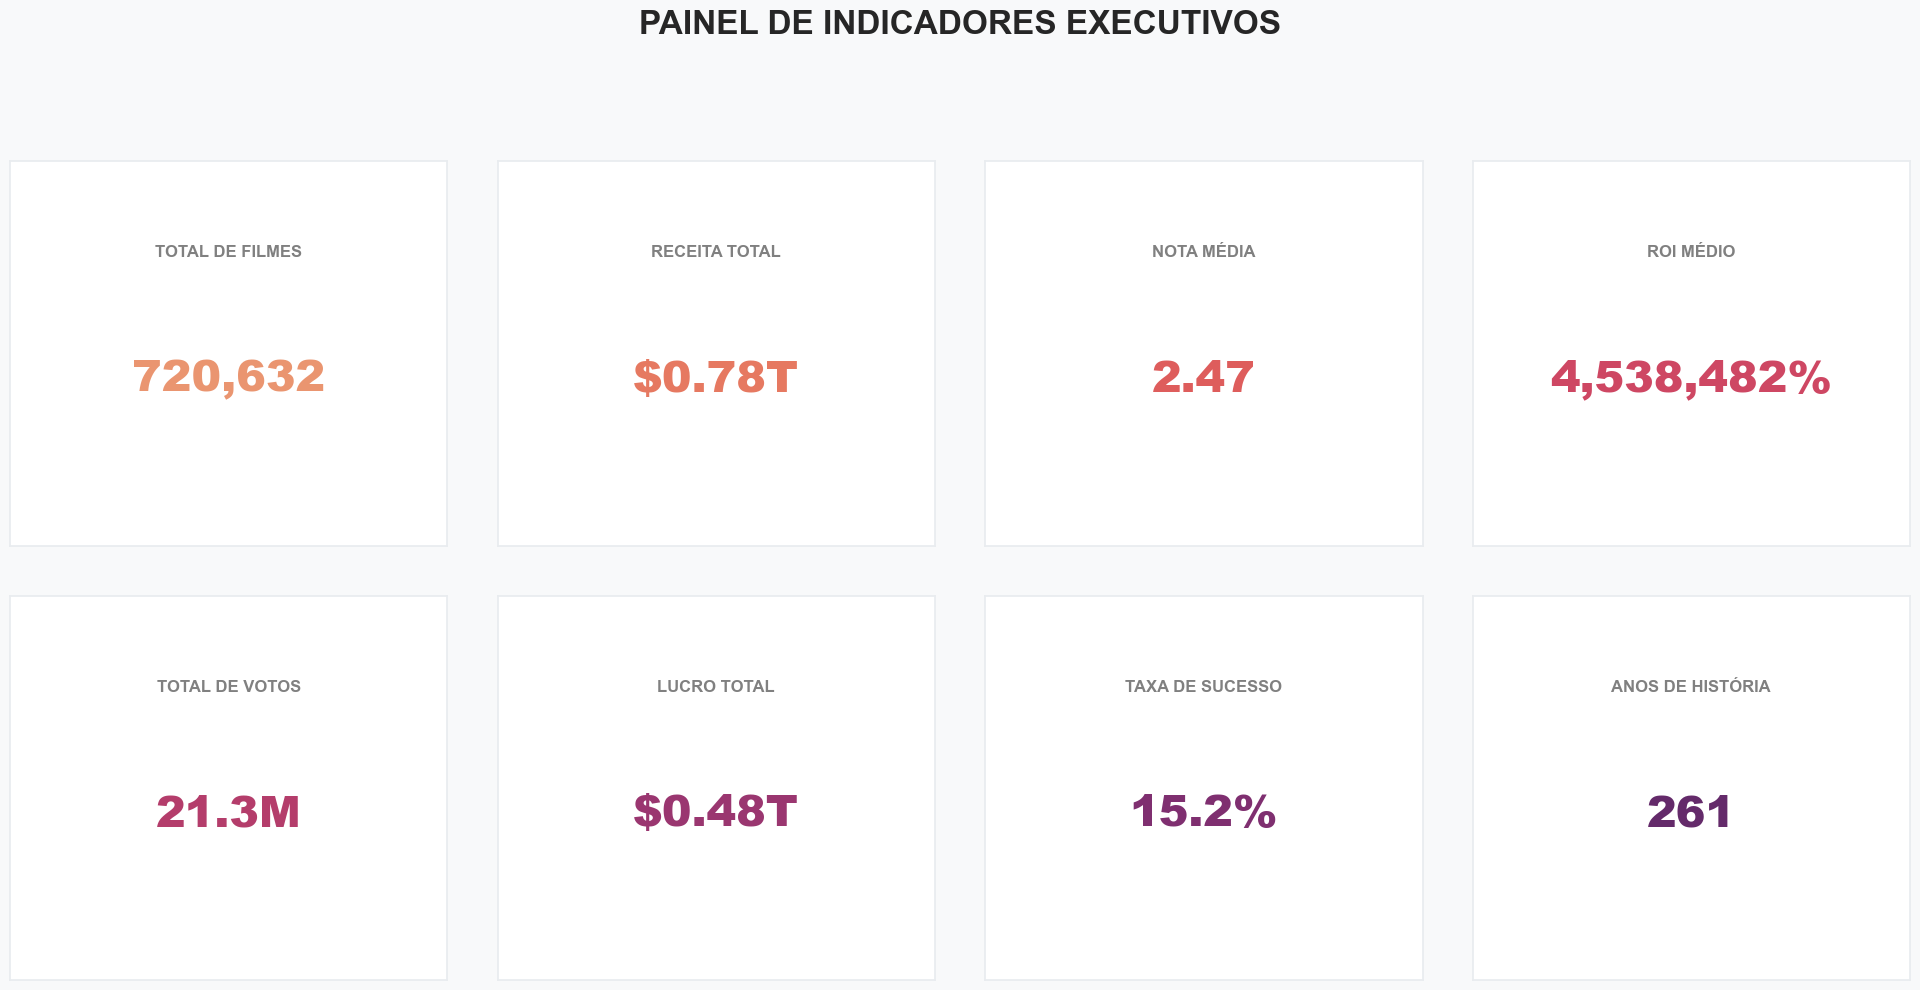

In [43]:
# --- 1. PROCESSAMENTO ULTRA RÁPIDO ---
# Convertendo apenas o necessário com métodos otimizados
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce').fillna(0)

# Para datas, pegamos apenas o Max e Min (não processa a coluna inteira)
data_min = pd.to_datetime(df['release_date'], errors='coerce').min()
data_max = pd.to_datetime(df['release_date'], errors='coerce').max()

# --- 2. CÁLCULO DIRETO DOS KPIs ---
total_filmes = len(df)
receita_total = df['revenue'].sum()
lucro_total = receita_total - df['budget'].sum()
nota_media_geral = df['vote_average'].mean()
votos_totais = df['vote_count'].sum()

# ROI e Sucesso (Apenas onde tem orçamento para não dar erro de divisão)
tem_budget = df[df['budget'] > 0]
roi_medio = ((tem_budget['revenue'] - tem_budget['budget']) / tem_budget['budget']).mean() * 100
taxa_sucesso = (len(tem_budget[tem_budget['revenue'] > tem_budget['budget']]) / len(tem_budget) * 100) if len(tem_budget) > 0 else 0
span_anos = int(data_max.year - data_min.year) if pd.notnull(data_max) else 0

# --- 3. DASHBOARD VISUAL ---
sns.set_theme(style="white")
cores = sns.color_palette("flare", 8)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.patch.set_facecolor('#F8F9FA') 
fig.suptitle('PAINEL DE INDICADORES EXECUTIVOS', fontsize=24, fontweight='bold', y=1.02)

# Lista organizada para o loop
dados_kpi = [
    ('TOTAL DE FILMES', f'{total_filmes:,}'),
    ('RECEITA TOTAL', f'${receita_total/1e12:.2f}T'),
    ('NOTA MÉDIA', f'{nota_media_geral:.2f}'),
    ('ROI MÉDIO', f'{roi_medio:,.0f}%'),
    ('TOTAL DE VOTOS', f'{votos_totais/1e6:.1f}M'),
    ('LUCRO TOTAL', f'${lucro_total/1e12:.2f}T'),
    ('TAXA DE SUCESSO', f'{taxa_sucesso:.1f}%'),
    ('ANOS DE HISTÓRIA', f'{span_anos}')
]

for i, ax in enumerate(axes.flatten()):
    ax.set_facecolor('white')
    for s in ax.spines.values():
        s.set_visible(True)
        s.set_color('#E9ECEF')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Texto: Título (Cima) e Valor (Centro)
    ax.text(0.5, 0.75, dados_kpi[i][0], ha='center', fontsize=12, fontweight='bold', color='gray', transform=ax.transAxes)
    ax.text(0.5, 0.40, dados_kpi[i][1], ha='center', fontsize=32, fontweight='black', color=cores[i], transform=ax.transAxes)

plt.tight_layout(pad=3.0)
plt.show()

### 4.2 Top 10 Filmes Mais Populares até 2024

Abaixo estão os 10 filmes com **mais votos** no IMDb até 2024, refletindo a popularidade em relação aos votos do público, observe que a popularidade não está ligada diretamente a qualidade, já que vários filmes com notas menores, estão mais populares que filmes mais bem colocados no quesito técnico e de nota

C:\Users\mathe\AppData\Local\Temp\ipykernel_5432\320396478.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


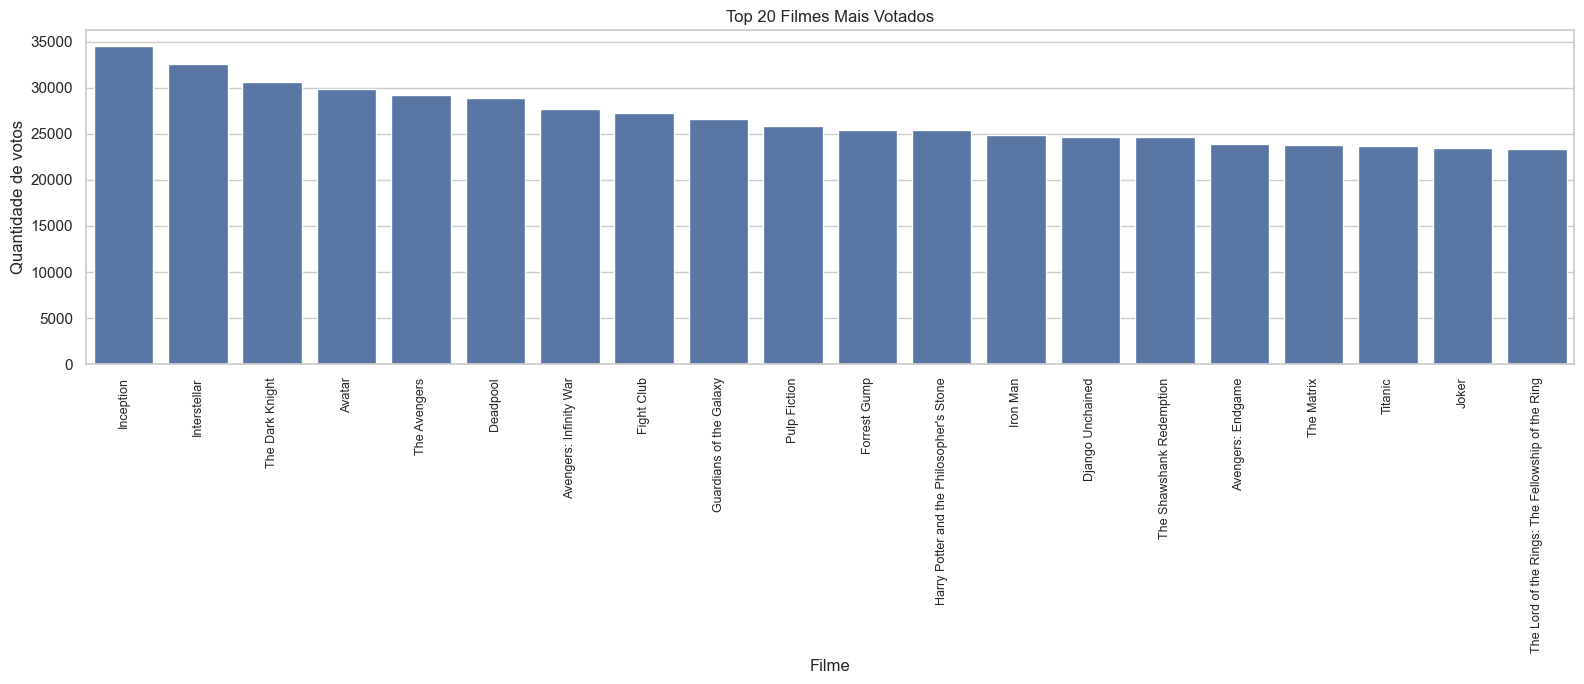

In [44]:
# Garante colunas numéricas
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

# Top 20 mais votados
top_20 = (
    df.dropna(subset=['vote_count', 'title'])
      .sort_values('vote_count', ascending=False)
      .head(20)
)

# Estilo
sns.set_theme(style="whitegrid")

# Cria figura
fig, ax = plt.subplots(figsize=(16, 7))

# Gráfico de barras (somente votos)
sns.barplot(
    data=top_20,
    x='title',
    y='vote_count',
    ax=ax
)

ax.set_title('Top 20 Filmes Mais Votados')
ax.set_xlabel('Filme')
ax.set_ylabel('Quantidade de votos')

# Nomes dos filmes em 90 graus
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    fontsize=9
)

plt.tight_layout()
plt.show()


### 4.3 Distribuição dos Gêneros dos filmes

O gráfico de pizza apresenta a distribuição dos gêneros cinematográficos presentes no dataset. Observa-se a predominância de alguns gêneros específicos, enquanto os demais aparecem com menor representatividade, evidenciando a diversidade de categorias na base analisada.
Podemos observar uma pequena alteração de **1–2%** nos gêneros **Romance** e **Drama**, assim como pequenas frações de porcentagem foram retiradas de gêneros como **Documentário**.  
Essas mudanças refletem a **remoção de filmes adultos** e a **limpeza de outliers**.


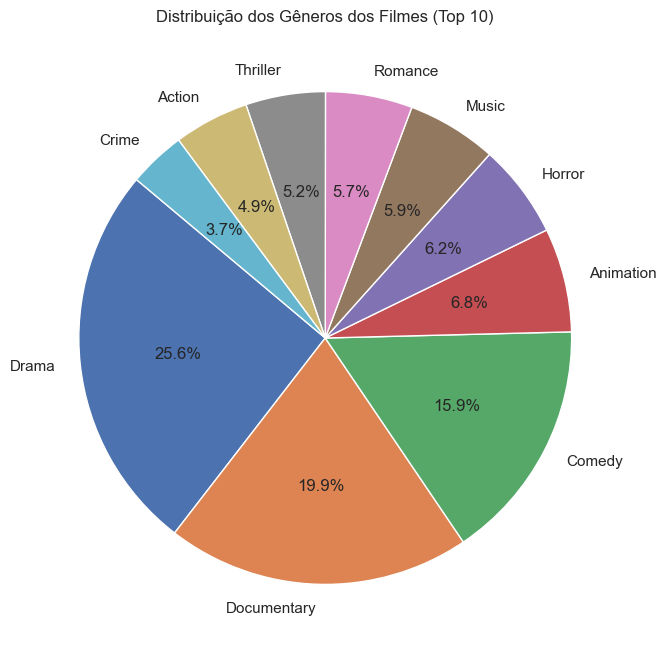

In [50]:
# Remover valores nulos
df = df.dropna(subset=['genres'])

# Separar gêneros (assumindo separação por vírgula)
generos = (
    df['genres']
    .str.split(',')
    .explode()
    .str.strip()
)

# Contar ocorrência de cada gênero
contagem_generos = generos.value_counts().head(10)  # Top 10 para melhor visualização

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    contagem_generos,
    labels=contagem_generos.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribuição dos Gêneros dos Filmes (Top 10)')
plt.show()

## 5. Análise Temporal

### 5.1 A Qualidade dos Filmes ao Longo do Tempo

Será que a qualidade dos filmes melhorou com o passar das décadas, ou a qualidade geral cinematógráfica está decaindo? 
Obviamente o padrão de exigência do telespectador aumentou, pórem, será que mesmo com um aumento das avaliações, a média geral dos filmes se mantém?

Os gráficos abaixo indicam que filmes antigos tendiam a ter notas maiores. Isso se deve porque existiam menos lançamentos e provavelmente um número de outliers considerável, porém mesmo com essas observações pode se observar que a média dos filmes de 2000 até 2020 acontece uma certa estabilização da média, com exceção de um declinio que pode ser visto no meio do intervalo, algo próximo do ano de 2010. 

Mesmo após o ETL, os valores de média se mantém extremamente próximos dos dados que recebemos na nossa camada RAW, com apenas uma pequena mudança na média dos filmes de 1890-1910, onde a média se alterou por conta dos outliers retirados


year
1895.0    4.022683
1896.0    2.927462
1897.0    2.232056
1898.0    2.057070
1899.0    2.461913
            ...   
2020.0    2.439423
2021.0    2.258040
2022.0    2.211447
2023.0    1.586594
2024.0    0.875224
Name: vote_average, Length: 130, dtype: float64


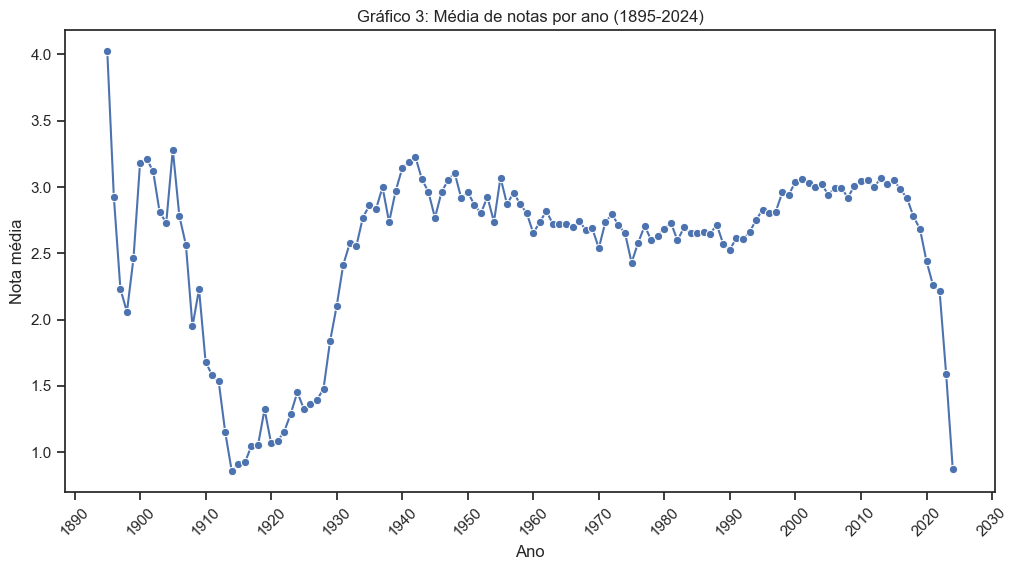

In [46]:

# Converte a coluna 'vote_average' para número, valores inválidos viram NaN
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# Extrai o ano da coluna 'release_date' (formato YYYY-MM-DD)
# Datetime arruma datas invalidas nessa coluna
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Filtra apenas linhas com ano válido
df_limpo = df.dropna(subset=['year', 'vote_average'])

# Filtra anos de 1895 a 2030 para focar em filmes reais e lançamentos recentes
df_limpo = df_limpo[(df_limpo['year'] >= 1895) & (df_limpo['year'] <= 2024)]

# Agrupa por ano e calcula a nota média de cada ano
media_por_ano = df_limpo.groupby('year')['vote_average'].mean().sort_index()

# Mostra a média de cada ano
print(media_por_ano)

# Importando Bibliotecas para plotagem
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Define o estilo do Seaborn
sns.set_style('ticks')

plt.figure(figsize=(12,6))
sns.lineplot(x=media_por_ano.index, y=media_por_ano.values, marker='o')
plt.title("Gráfico 3: Média de notas por ano (1895-2024)")
plt.xlabel("Ano")
plt.ylabel("Nota média")

# Configura os intervalos do eixo X para 10 em 10 anos
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xticks(rotation=45)  # Rotaciona os labels para melhor visualização

plt.show()

### 5.2 Sazonalidade de Lançamentos (por mês)

Este gráfico apresenta Sazonalidade de Lançamentos (por mês), facilitando a leitura de padrões e comparações relevantes.


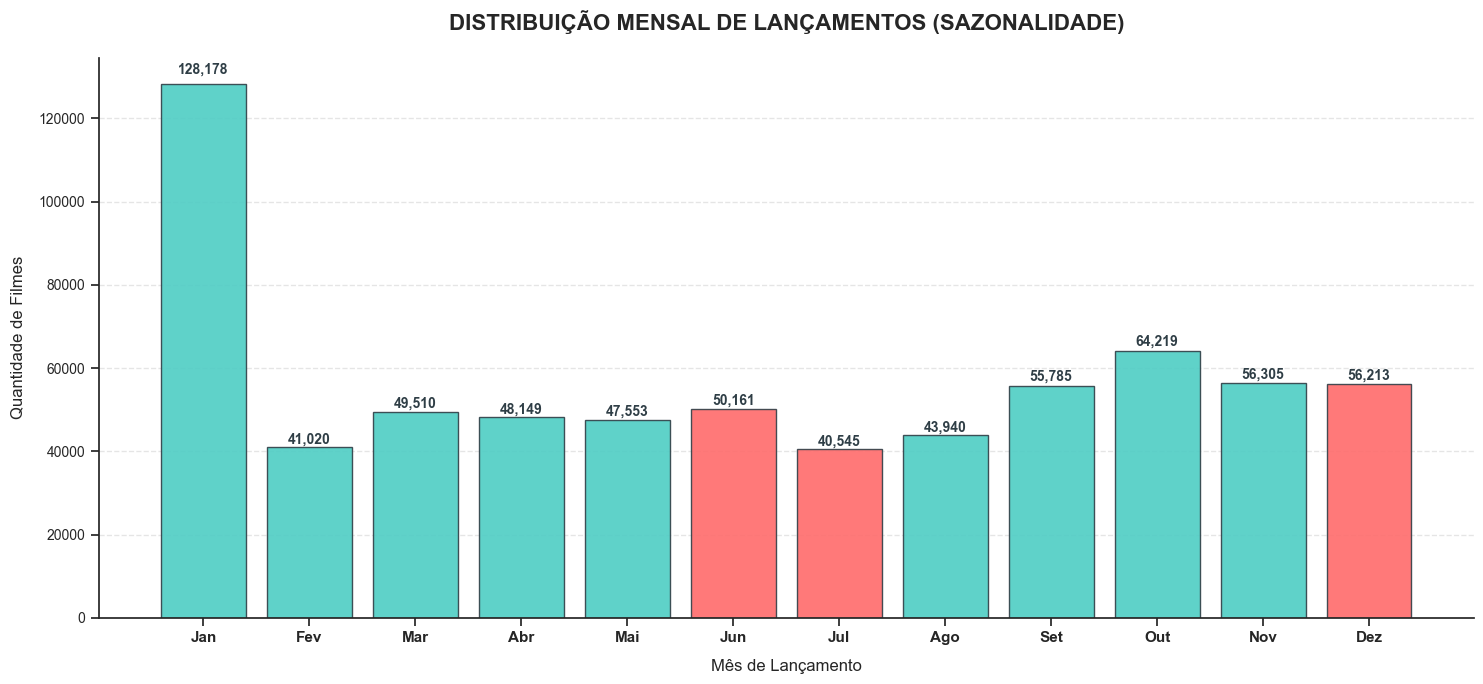

In [47]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Filtra apenas filmes com data válida
df_vendas = df[df['release_date'].notna()].copy()
df_vendas['month'] = df_vendas['release_date'].dt.month

# Contagem por mês
lancamentos_por_mes = df_vendas['month'].value_counts().sort_index()

# Configurações do gráfico
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(15, 7))
fig.patch.set_facecolor('#F8F9FA')

# Cores das barras
cores_barra = ['#4ECDC4' for _ in range(12)]
# Destacando Junho (6), Julho (7) e Dezembro (12)
for m in [5, 6, 11]: cores_barra[m] = '#FF6B6B' 

# 3. PLOTAGEM
plt.bar(range(1, 13), lancamentos_por_mes.values, color=cores_barra, edgecolor='#2F3E46', alpha=0.9)

# Estilização
plt.xticks(range(1, 13), meses, fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('Mês de Lançamento', fontsize=12, labelpad=10)
plt.ylabel('Quantidade de Filmes', fontsize=12, labelpad=10)
plt.title('DISTRIBUIÇÃO MENSAL DE LANÇAMENTOS (SAZONALIDADE)', fontsize=16, fontweight='bold', pad=20)

# Adicionar os valores no topo de cada barra
for i, v in enumerate(lancamentos_por_mes.values):
    plt.text(i + 1, v + (v * 0.02), f'{v:,}', ha='center', fontsize=10, fontweight='bold', color='#2F3E46')

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
sns.despine() # Remove as bordas desnecessárias
plt.tight_layout()
plt.show()

# 4. RESULTADOS EM TEXTO
mes_mais_idx = lancamentos_por_mes.idxmax()
mes_menos_idx = lancamentos_por_mes.idxmin()

### 5.3 Evolução da Receita Total da Indústria Cinematográfica (1920-2024)

Este gráfico apresenta Evolução da Receita Total da Indústria Cinematográfica (1920-2024).

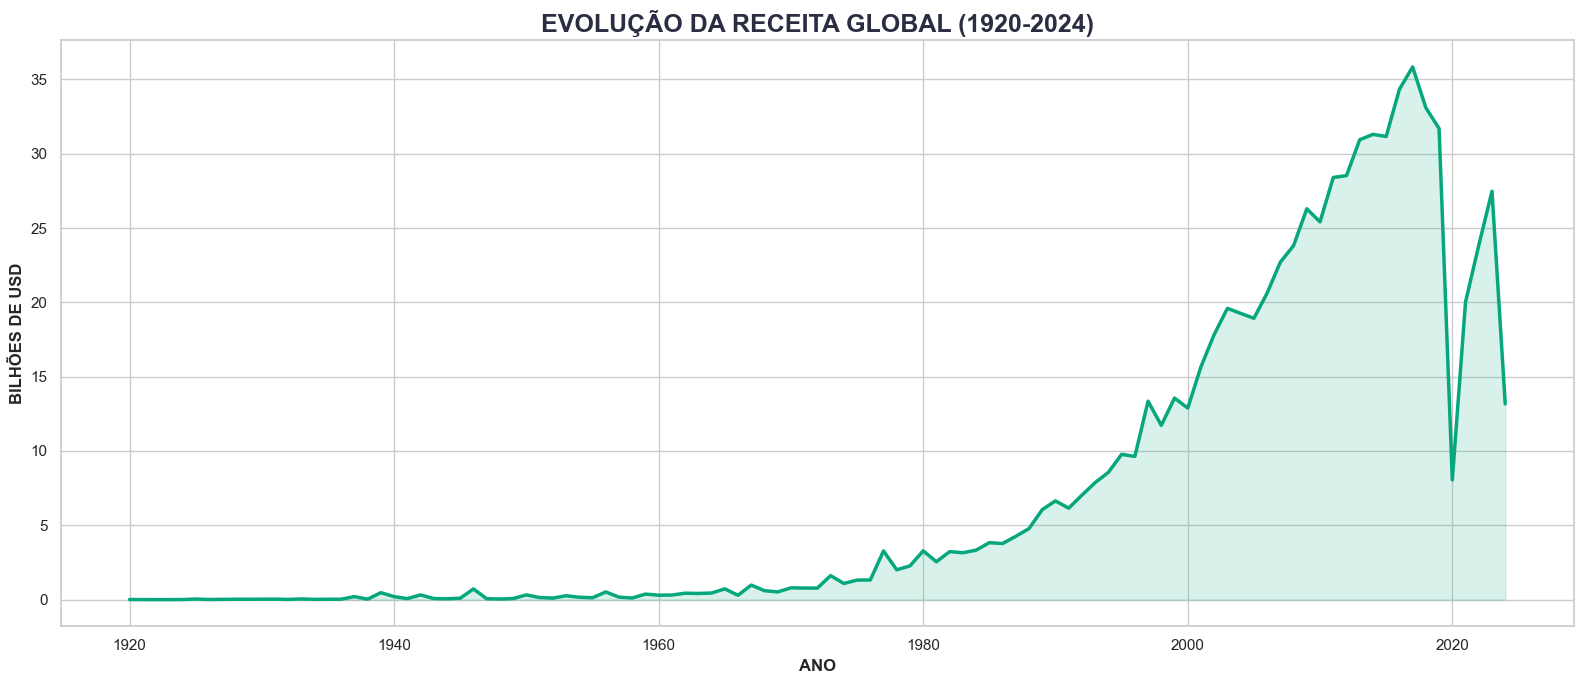

In [48]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

df_temporal = df[(df['year'] >= 1920) & (df['year'] <= 2024)].copy()
receita_por_ano = df_temporal.groupby('year')['revenue'].sum() / 1e9

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 7))

plt.plot(receita_por_ano.index, receita_por_ano.values, linewidth=2.5, color='#06A77D')
plt.fill_between(receita_por_ano.index, receita_por_ano.values, alpha=0.15, color='#06A77D')

plt.title('EVOLUÇÃO DA RECEITA GLOBAL (1920-2024)', fontsize=18, fontweight='bold', color='#2B2D42')
plt.xlabel('ANO', fontweight='bold')
plt.ylabel('BILHÕES DE USD', fontweight='bold')

plt.tight_layout()
plt.show()

##  6. Segmentação de Mercado e Produção

### 6.1 Contagem de Produtoras por Filme

Muitas vezes, filmes são produzidos por múltiplas produtoras. Abaixo, podemos ver a contagem de produtoras envolvidas na produção dos filmes.

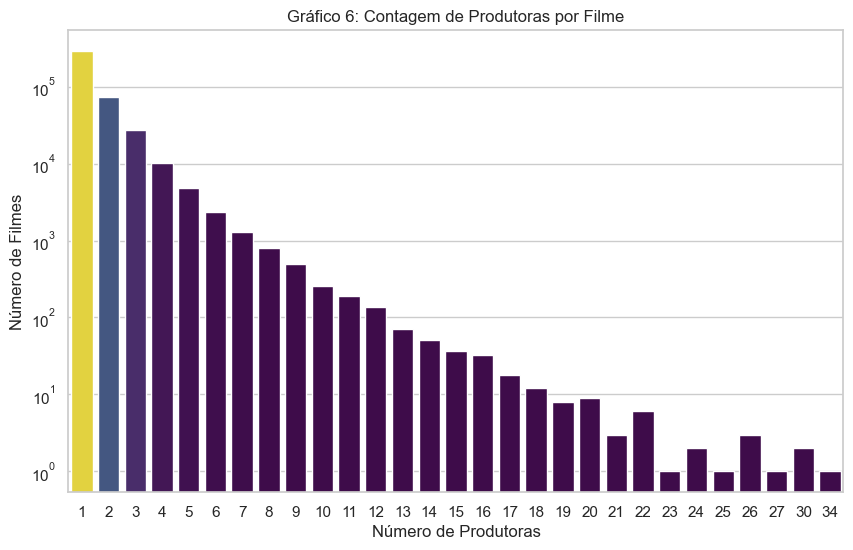

In [51]:
# Contagem de produtoras por filme
from collections import Counter
produtora_counter = Counter()

for produtoras in df['production_companies'].dropna():
    # Contar quantidade de produtoras no filme
    produtoras_list = produtoras.split(',')
    produtoras_count = len(produtoras_list)
    produtora_counter[produtoras_count] += 1

# Converte o Counter para DataFrame para facilitar a plotagem
produtora_df = pd.DataFrame.from_dict(produtora_counter, orient='index', columns=['Número de Filmes'])
produtora_df.index.name = 'Número de Produtoras'
produtora_df = produtora_df.sort_index()

# Plotagem
plt.figure(figsize=(10,6))
ax = sns.barplot(x=produtora_df.index, y=produtora_df['Número de Filmes'], palette="viridis", hue=produtora_df['Número de Filmes'], legend=False)
ax.set_yscale('log')  # Escala logarítmica para melhor visualização
plt.title("Gráfico 6: Contagem de Produtoras por Filme")
plt.xlabel("Número de Produtoras")
plt.ylabel("Número de Filmes")
plt.show()

### 6.2 Produtoras com Mais Filmes Produzidos

O objetivo desta análise é identificar as produtoras que mais contribuíram para a indústria cinematográfica em termos de quantidade de filmes produzidos.

O top 15 mudou considerávelmente após a retirada de filmes adultos e outliers, deixando uma representação mais real das produtoras dominantes no aspecto de produção de filmes

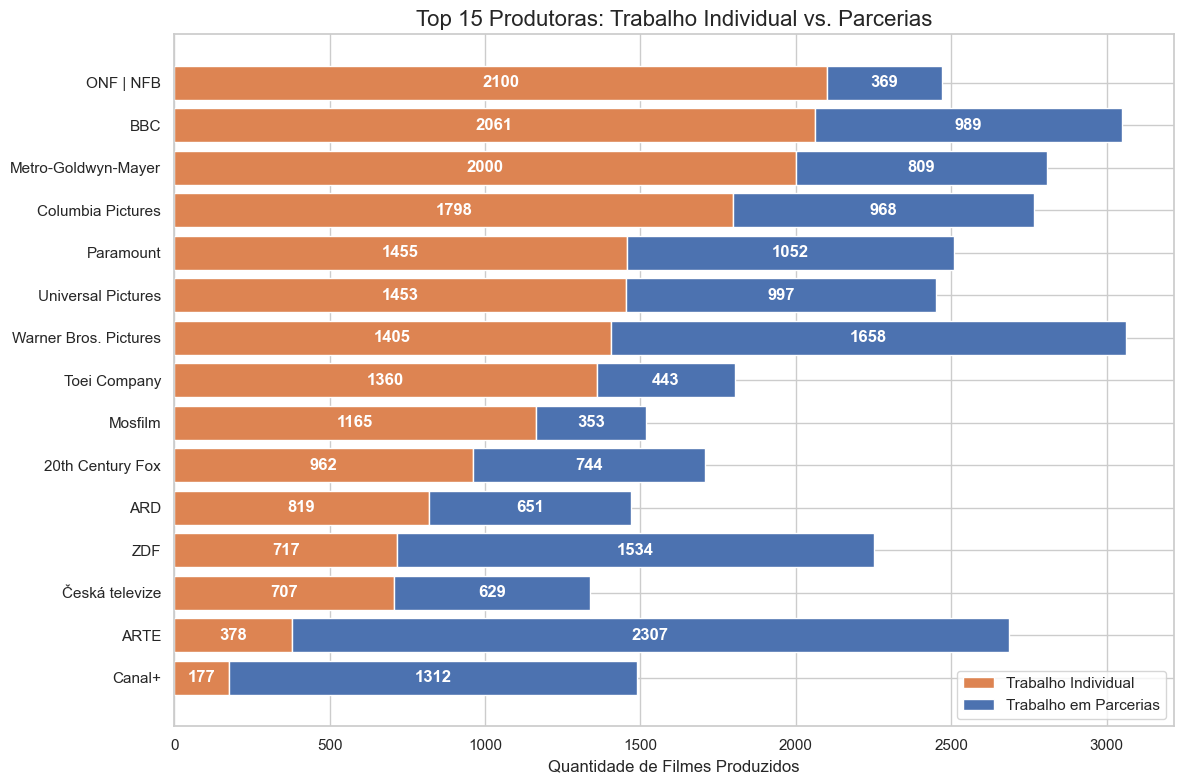

In [ ]:

df['production_companies'] = df['production_companies'].fillna('')

# Filtrar strings vazias ANTES de fazer a contagem
df_filtered = df[df['production_companies'].str.strip() != '']

# Total de aparições
total_counts = df_filtered['production_companies'].str.split(', ').explode()
total_counts = total_counts[total_counts.str.strip() != ''].value_counts()

# Filmes solo (excluindo vazios)
solo_movies = df_filtered[~df_filtered['production_companies'].str.contains(',', na=False)]
solo_movies = solo_movies[solo_movies['production_companies'].str.strip() != '']
solo_counts = solo_movies['production_companies'].value_counts()

# Top 15 produtoras por total
top_15 = total_counts.head(15).index

# DataFrame para plot
df_plot = pd.DataFrame({
    'Produtora': top_15,
    'Individual': solo_counts.reindex(top_15, fill_value=0),
    'Parcerias': total_counts[top_15] - solo_counts.reindex(top_15, fill_value=0)
})

df_plot = df_plot.sort_values('Individual', ascending=True)

# --- Plotagem ---
fig, ax = plt.subplots(figsize=(12, 8))

# Barra individual
ax.barh(df_plot['Produtora'], df_plot['Individual'], color='#dd8452', label='Trabalho Individual')

# Barra de parceria
ax.barh(df_plot['Produtora'], df_plot['Parcerias'], 
        left=df_plot['Individual'], 
        color='#4c72b0', 
        label='Trabalho em Parcerias')

# Títulos e labels
ax.set_xlabel('Quantidade de Filmes Produzidos', fontsize=12)
ax.set_title('Top 15 Produtoras: Trabalho Individual vs. Parcerias', fontsize=16)
ax.set_ylabel('')
ax.legend(loc='lower right')

# Adicionar valores nas barras para melhor leitura
for i, (ind, par) in enumerate(zip(df_plot['Individual'], df_plot['Parcerias'])):
    if ind > 0:
        ax.text(ind/2, i, f'{int(ind)}', 
                ha='center', va='center', 
                color='white', fontweight='bold')
    if par > 0:
        ax.text(ind + par/2, i, f'{int(par)}', 
                ha='center', va='center', 
                color='white', fontweight='bold')

plt.tight_layout()
plt.show()


### 6.3 Análise da Receita por Quantidade de Produtoras

O objetivo é verificar se o número de produtoras impacta o sucesso financeiro do filme. Para evitar distorções causadas por sucessos isolados (outliers), focaremos na mediana da receita, buscando entender qual é o retorno financeiro mais realista e típico para cada cenário.

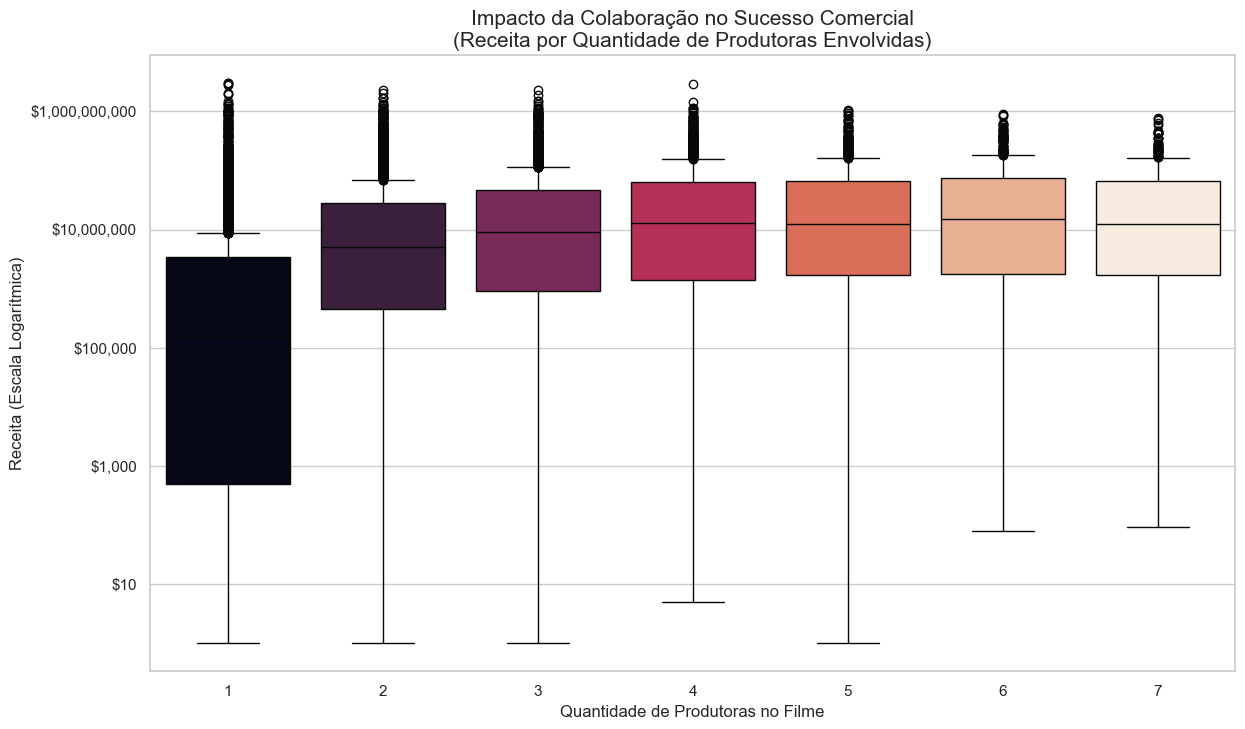

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df['qtd_produtoras'] = df['production_companies'].fillna('a').apply(lambda x: len(str(x).split(',')))

df_financeiro = df[
    (df['qtd_produtoras'] <= 7) &
    (df['revenue'] > 0) 
]

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(
    data=df_financeiro,
    x='qtd_produtoras',
    y='revenue',
    palette='rocket',
    hue='qtd_produtoras',
    legend=False
)

ax.set_yscale("log")

# Títulos e Labels
ax.set_title('Impacto da Colaboração no Sucesso Comercial\n(Receita por Quantidade de Produtoras Envolvidas)', fontsize=15)
ax.set_xlabel('Quantidade de Produtoras no Filme', fontsize=12)
ax.set_ylabel('Receita (Escala Logarítmica)', fontsize=12)

import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '${:,.0f}'.format(y)))

plt.show()

### 6.4 Top 15 Gêneros por Receita Total

Este gráfico apresenta Top 15 Gêneros por Receita Total, facilitando a leitura de padrões e comparações relevantes.


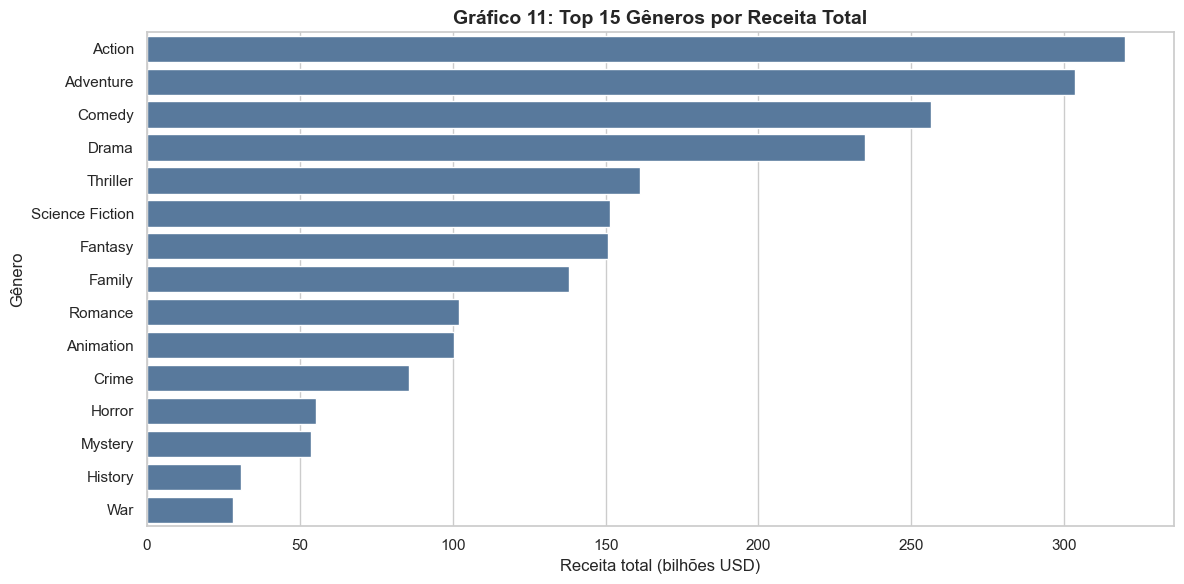

In [72]:
# Top 15 gêneros por receita total

df_gen = df[df["genres"].notna() & (df["revenue"] > 0)][["genres", "revenue"]].copy()
df_gen = df_gen.assign(genre=df_gen["genres"].str.split(", ")).explode("genre")
df_gen["genre"] = df_gen["genre"].str.strip()
df_gen = df_gen[(df_gen["genre"] != "") & (df_gen["genre"] != "nan")]

genre_revenue = df_gen.groupby("genre")["revenue"].sum().nlargest(15).reset_index()
genre_revenue["revenue_bi"] = genre_revenue["revenue"] / 1e9

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_revenue, x="revenue_bi", y="genre", color="#4C78A8")
plt.xlabel("Receita total (bilhões USD)")
plt.ylabel("Gênero")
plt.title("Gráfico 11: Top 15 Gêneros por Receita Total", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


### 6.5 Top 15 Países Produtores (por volume)

Este gráfico apresenta Top 15 Países Produtores (por volume), facilitando a leitura de padrões e comparações relevantes.


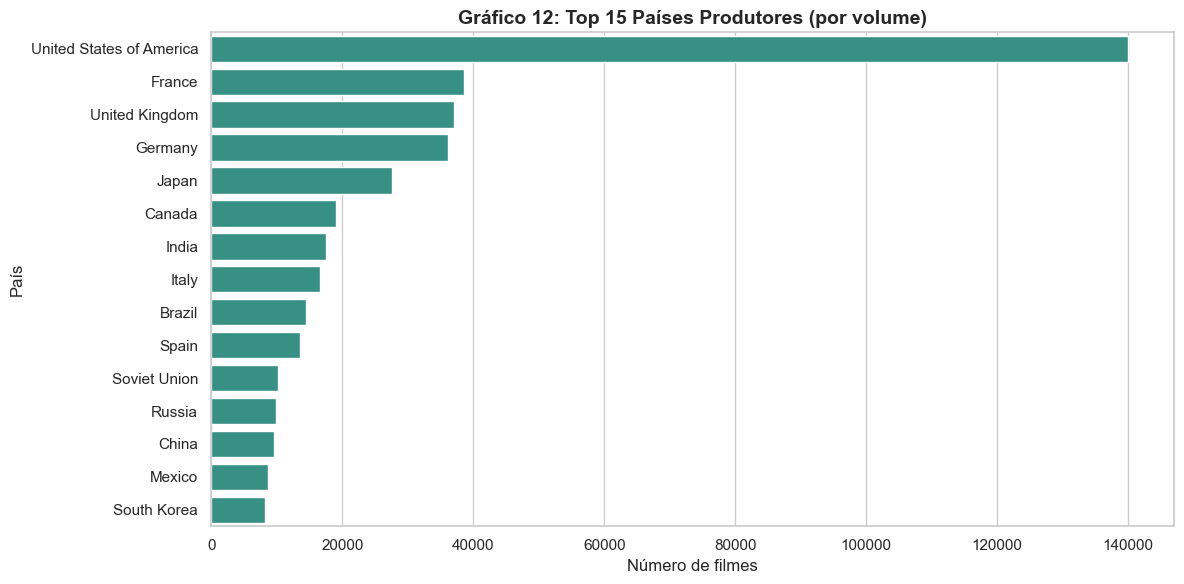

In [73]:
# Top 15 países produtores (por volume)

df_country = df[df["production_countries"].notna()][["production_countries"]].copy()
df_country = df_country.assign(country=df_country["production_countries"].str.split(", ")).explode("country")
df_country["country"] = df_country["country"].str.strip()
df_country = df_country[(df_country["country"] != "") & (df_country["country"] != "nan")]

country_counts = df_country["country"].value_counts().head(15).reset_index()
country_counts.columns = ["country", "count"]

plt.figure(figsize=(12, 6))
sns.barplot(data=country_counts, x="count", y="country", color="#2A9D8F")
plt.xlabel("Número de filmes")
plt.ylabel("País")
plt.title("Gráfico 12: Top 15 Países Produtores (por volume)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


### 6.6 Correlação entre Variáveis Financeiras e Popularidade
O gráfico busca verificar se há relação entre variáveis de popularidade com o investimento e/ou o lucro gerado pelo filme. 

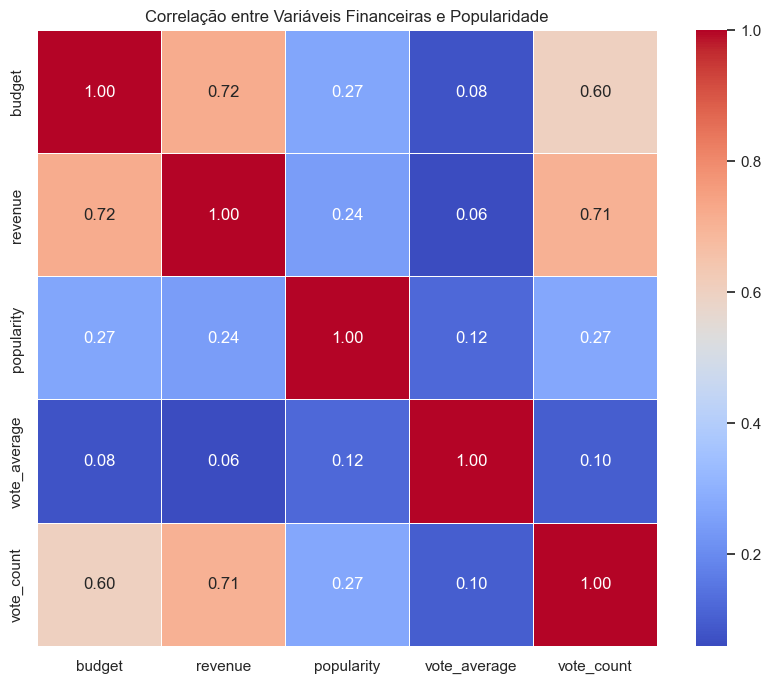

In [74]:
cols_fin = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']
corr_matrix = df[cols_fin].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação entre Variáveis Financeiras e Popularidade')
plt.show()

## 7. Análise Financeira

### 7.1 Heatmap de ROI médio por década e gênero (top 8)
Este gráfico apresenta Heatmap de ROI médio por década e gênero (top 8), facilitando a leitura de padrões e comparações relevantes.

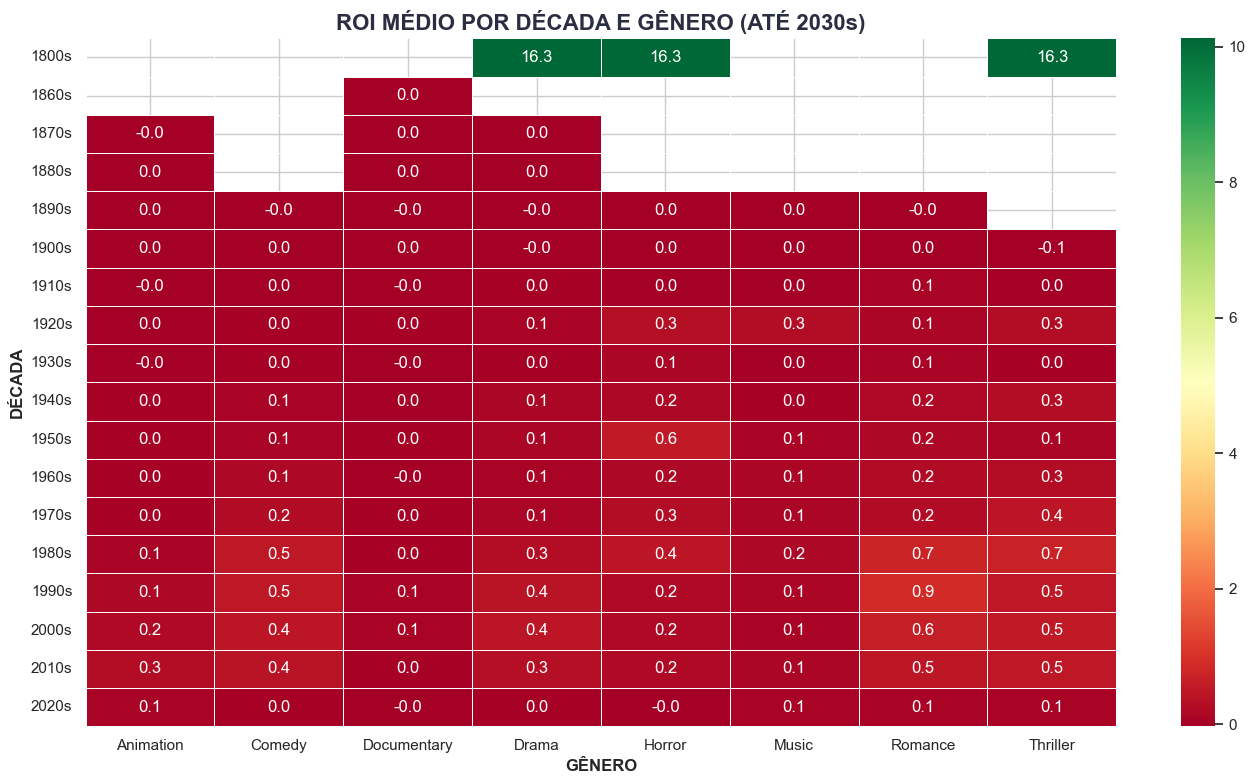

In [75]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
df['roi'] = (df['revenue'] - df['budget']) / df['budget'].replace(0, 1)

# Filtra até o fim da década de 2020
df = df[df['year'] <= 2029].copy()
df['decade'] = (df['year'] // 10 * 10).fillna(0).astype(int).astype(str) + 's'

roi_cap_99 = df['roi'].quantile(0.99)
df_gen_roi = df[df["genres"].notna()][["genres", "roi", "decade"]].copy()
df_gen_roi["roi"] = df_gen_roi["roi"].clip(upper=roi_cap_99)

df_gen_roi = df_gen_roi.assign(genre=df_gen_roi["genres"].str.split(", ")).explode("genre")
df_gen_roi["genre"] = df_gen_roi["genre"].str.strip()
df_gen_roi = df_gen_roi[df_gen_roi["genre"] != ""]

top_genres = df_gen_roi["genre"].value_counts().head(8).index
pivot_gen = df_gen_roi[df_gen_roi["genre"].isin(top_genres)].groupby(["decade", "genre"])["roi"].mean().unstack()
pivot_gen = pivot_gen.sort_index()

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_gen, cmap="RdYlGn", annot=True, fmt=".1f", linewidths=0.5, robust=True)

plt.title("ROI MÉDIO POR DÉCADA E GÊNERO (ATÉ 2030s)", fontsize=16, fontweight="bold", color='#2B2D42')
plt.xlabel("GÊNERO", fontweight="bold")
plt.ylabel("DÉCADA", fontweight="bold")

plt.tight_layout()
plt.show()

### 6.7 Duração x Popularidade

Este gráfico apresenta a relação entre a duração dos filmes (runtime) e sua pontuação de popularidade (popularity). Cada ponto representa um filme do dataset, permitindo identificar padrões gerais e a presença de valores atípicos. Observa-se que a maioria dos filmes se concentra em durações médias, enquanto alguns títulos com tempo de exibição muito elevado ou muito reduzido se destacam como outliers. A visualização também possibilita analisar se filmes mais longos tendem, ou não, a apresentar maior popularidade junto ao público.

Após a limpeza de outliers é visivel que existem algumas exceções no aspecto de duração de filme, o gráfico está certamente diferente em relação ao anterior, justificando o que achavamos ser outliers, são apenas valores de exceção

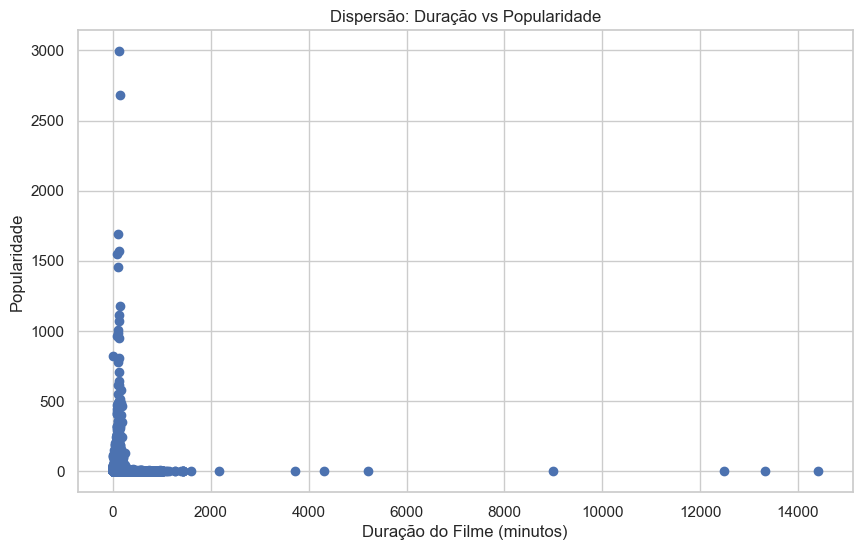

Top 10 filmes com maior pontuação de popularidade:
               title  runtime  popularity
0        Blue Beetle    128.0    2994.357
1       Gran Turismo    135.0    2680.593
2         The Nun II    110.0    1692.778
3  Meg 2: The Trench    116.0    1567.273
4        Retribution     91.0    1547.220
5         Talk to Me     95.0    1458.514
6             Fast X    142.0    1175.267
7   Sound of Freedom    131.0    1111.036
8             Barbie    114.0    1069.340
9          Elemental    102.0    1008.942

Top 10 filmes maior duração:
                               title  runtime  popularity
268728          Modern Times Forever  14400.0       0.896
495195    Svalbard minutt for minutt  13319.0       0.600
94608                      Cinématon  12480.0       1.968
329886                  Beijing 2003   9000.0       0.707
174818         The Cure For Insomnia   5220.0       1.352
231844                  #ALLMYMOVIES   4320.0       1.038
215593  Giant 600 Cartoon Collection   3720.0      

In [76]:
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df_limpo = df.dropna(subset=['runtime', 'popularity'])

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_limpo['runtime'], df_limpo['popularity'])
plt.title('Dispersão: Duração vs Popularidade')
plt.xlabel('Duração do Filme (minutos)')
plt.ylabel('Popularidade')
plt.show()

# Define rankings
popularityRank = df.sort_values(by='popularity', ascending=False).head(10)
runtimeRank = df.sort_values(by='runtime', ascending=False).head(10)

# Selecionar colunas relevantes
resultado = popularityRank[['title', 'runtime', 'popularity']]

print("Top 10 filmes com maior pontuação de popularidade:")
print(resultado)

resultado = runtimeRank[['title', 'runtime', 'popularity']]
print("\nTop 10 filmes maior duração:")
print(resultado)


### 7.2 Orçamento vs Lucro

Este gráfico apresenta Orçamento vs Lucro, facilitando a leitura de padrões e comparações relevantes.

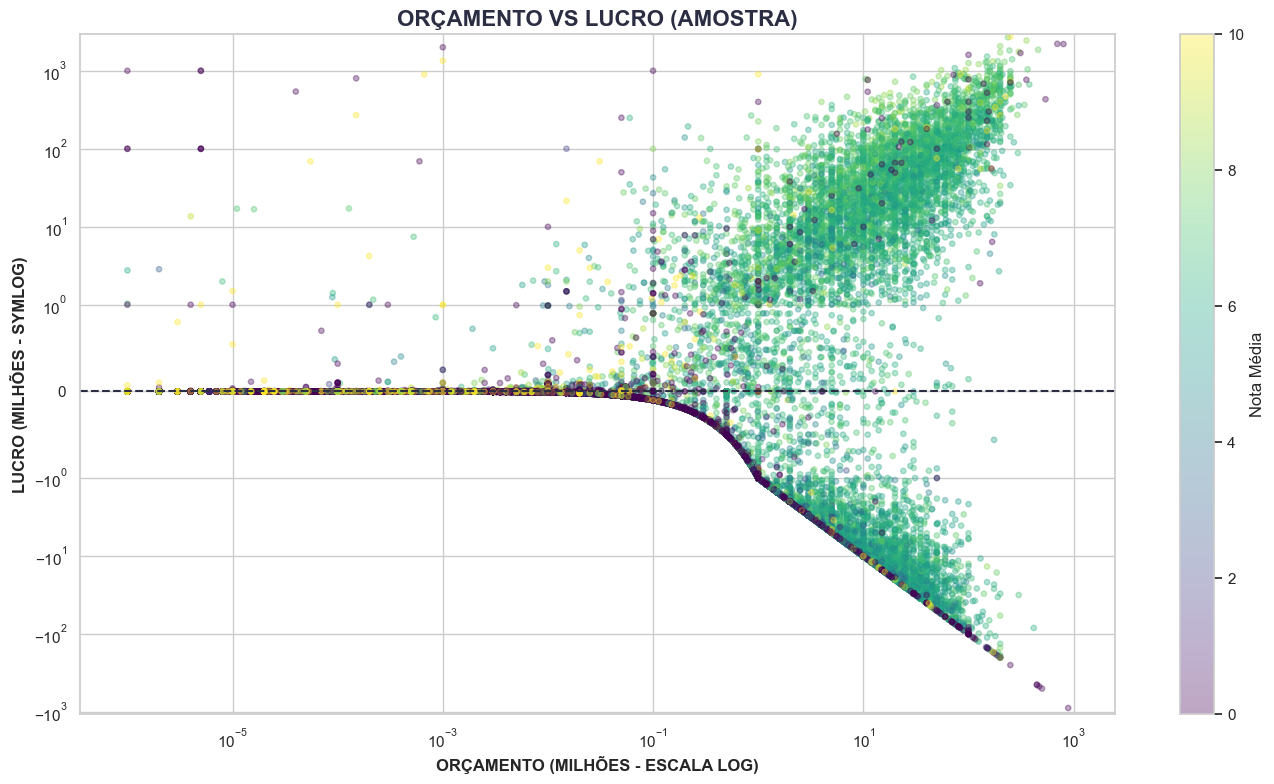

In [77]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
df['profit'] = df['revenue'] - df['budget']
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce').fillna(0)

df_plot = df[df['budget'] > 0].copy()
if len(df_plot) > 50000:
    df_plot = df_plot.sample(50000, random_state=42)

plt.figure(figsize=(14, 8))
sc = plt.scatter(df_plot["budget"] / 1e6, df_plot["profit"] / 1e6,
                 alpha=0.35, s=15, c=df_plot["vote_average"], cmap="viridis")

plt.colorbar(sc, label="Nota Média")
plt.xscale("log")
plt.yscale("symlog", linthresh=1)
plt.axhline(0, color="#2B2D42", linestyle="--", linewidth=1.5)

plt.xlabel("ORÇAMENTO (MILHÕES - ESCALA LOG)", fontweight="bold")
plt.ylabel("LUCRO (MILHÕES - SYMLOG)", fontweight="bold")
plt.title("ORÇAMENTO VS LUCRO (AMOSTRA)", fontsize=16, fontweight="bold", color='#2B2D42')

plt.tight_layout()
plt.show()